In [5]:
import os
import numpy as np
import torch
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score
from collections import Counter
import random
from tqdm import tqdm  
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Number of breeds (classes): 120

Number of samples in each breed:
n02091635-otterhound: 151 samples
n02102318-cocker_spaniel: 159 samples
n02101388-Brittany_spaniel: 152 samples
n02088094-Afghan_hound: 239 samples
n02085936-Maltese_dog: 252 samples
n02104365-schipperke: 154 samples
n02100877-Irish_setter: 155 samples
n02086079-Pekinese: 149 samples
n02099601-golden_retriever: 150 samples
n02100583-vizsla: 154 samples
n02102177-Welsh_springer_spaniel: 150 samples
n02093256-Staffordshire_bullterrier: 155 samples
n02106166-Border_collie: 150 samples
n02093991-Irish_terrier: 169 samples
n02109961-Eskimo_dog: 150 samples
n02110958-pug: 200 samples
n02105412-kelpie: 153 samples
n02094433-Yorkshire_terrier: 164 samples
n02097474-Tibetan_terrier: 206 samples
n02089867-Walker_hound: 153 samples
n02110627-affenpinscher: 150 samples
n02113186-Cardigan: 155 samples
n02102040-English_springer: 159 samples
n02089973-English_foxhound: 157 samples
n02098286-West_Highland_white_terrier: 169 samples
n0

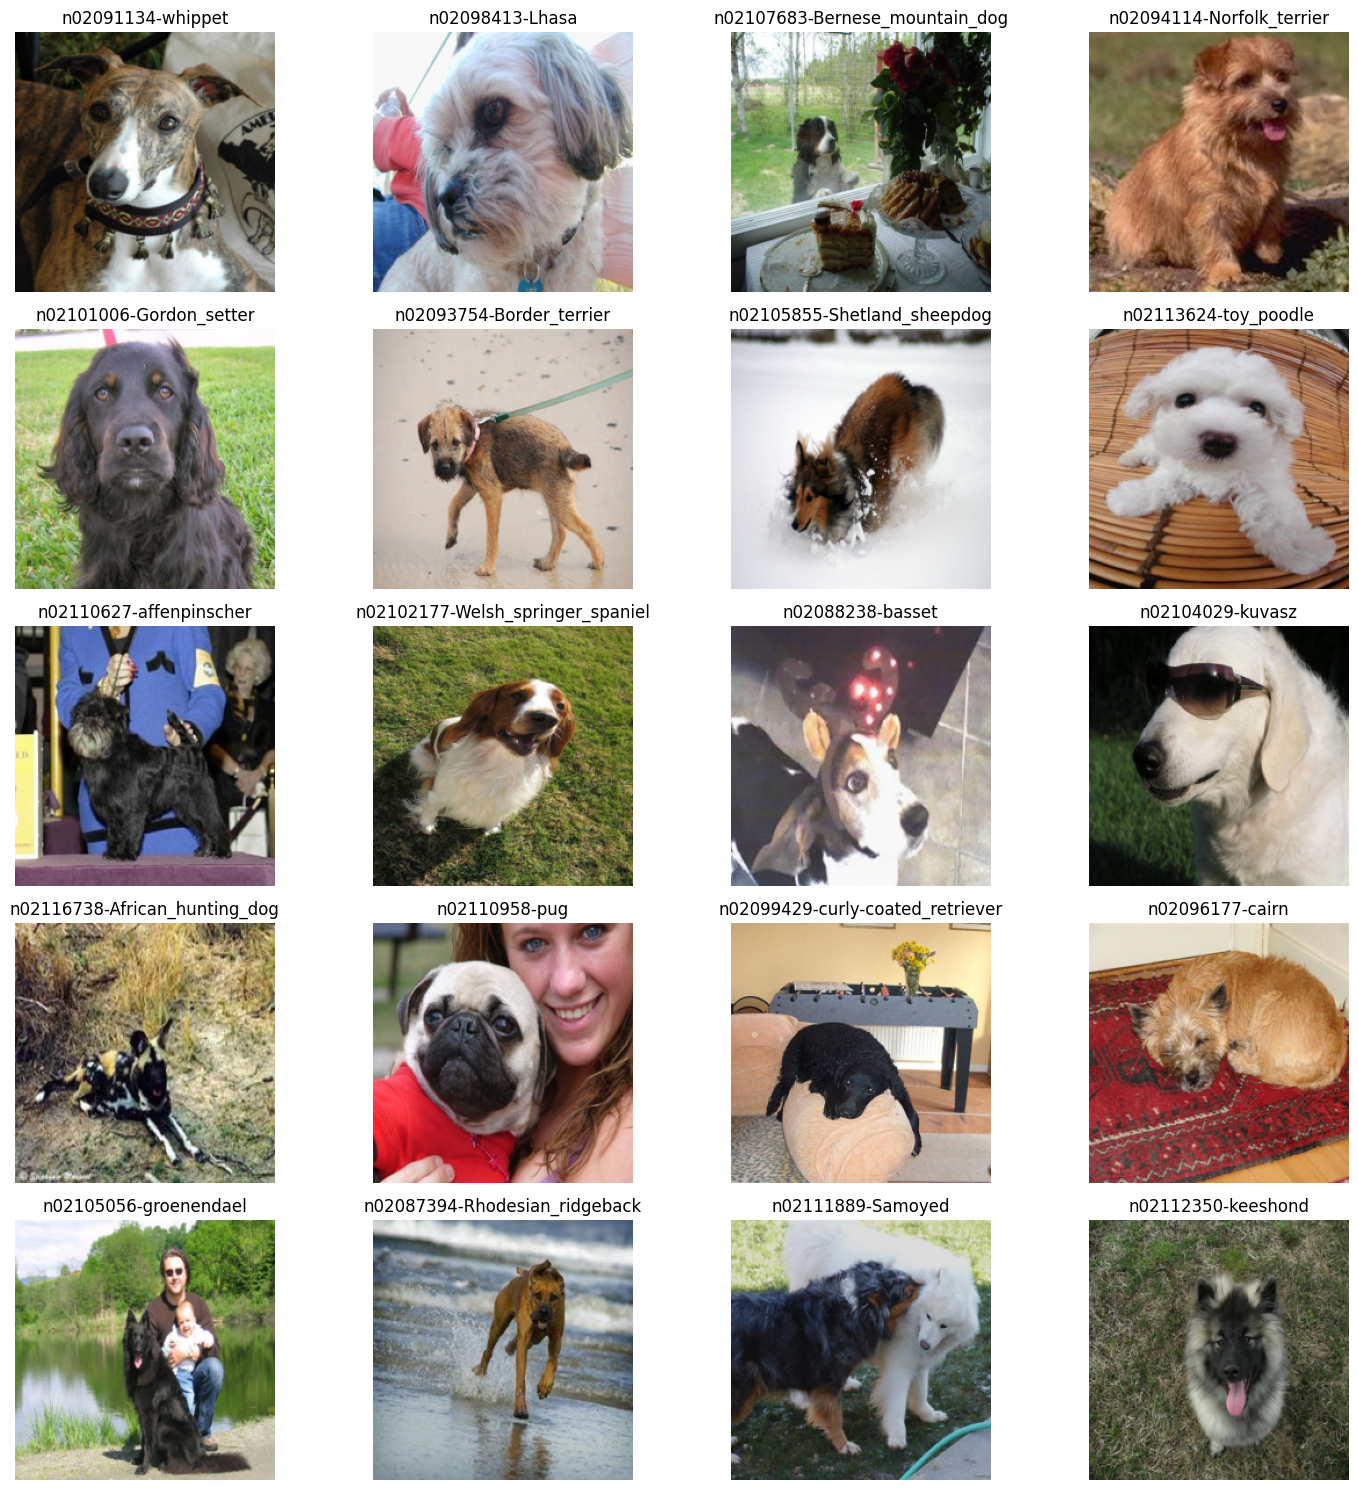

In [8]:
import os

from torchvision import datasets, transforms
# Path to the main images folder
images_folder = '/kaggle/input/stanford-dogs-dataset/images/Images'

# List all breed folders inside the 'Images' folder
breed_folders = [folder for folder in os.listdir(images_folder) if os.path.isdir(os.path.join(images_folder, folder))]

# Extract the number of samples (images) for each breed
class_counts = {}

for breed in breed_folders:
    breed_folder = os.path.join(images_folder, breed)
    image_files = [f for f in os.listdir(breed_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]  # Images with common extensions
    class_counts[breed] = len(image_files)

# Number of breeds
num_classes = len(class_counts)
print(f"\nNumber of breeds (classes): {num_classes}")

# Display the number of samples in each breed
print("\nNumber of samples in each breed:")
for breed, count in class_counts.items():
    print(f"{breed}: {count} samples")

# --- PyTorch Code for loading and displaying images --- #

# Define transformations to resize images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to Tensor
])

# Load the dataset using ImageFolder (to use with PyTorch)
dataset = datasets.ImageFolder(root=images_folder, transform=transform)

# Number of classes (breeds) in the dataset
num_classes = len(dataset.classes)

# Select 20 random classes
random_classes = random.sample(dataset.classes, 20)

# Dictionary to store images for each breed
breed_images = {breed: None for breed in random_classes}  # Initially set to None for each breed

# Store one image for each breed
for image, label in DataLoader(dataset, batch_size=1, shuffle=False):
    breed_name = dataset.classes[label.item()]
    
    # If this breed is in the random selection and no image has been stored for it yet
    if breed_name in breed_images and breed_images[breed_name] is None:
        breed_images[breed_name] = image[0]  # Extract the first image from the batch (since each batch is 4D in PyTorch)
        # If all 20 images from random classes have been selected, break the loop
        if all(breed_images[breed] is not None for breed in breed_images):
            break

# Display images from 20 random classes
fig, axes = plt.subplots(5, 4, figsize=(15, 15))  # 5 rows and 4 columns
axes = axes.flatten()

# Display each image along with its breed label
for i, (breed, image_tensor) in enumerate(breed_images.items()):
    ax = axes[i]
    ax.imshow(image_tensor.permute(1, 2, 0))  # Change image dimensions from (C, H, W) to (H, W, C)
    ax.set_title(f'{breed}')
    ax.axis('off')  # Hide the axis

plt.tight_layout()  # For better layout
plt.show()


In [ ]:
## croup

In [10]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def crop_image(breed, dog, data_dir):
    
    # Correct the image path: the 'images/Images/' folder should be used
    img_path = os.path.join(data_dir, 'images', 'Images', breed, dog + '.jpg')
    
    # Check if the image exists at the specified path
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        return None

    # Read the image using matplotlib
    img = plt.imread(img_path)

    # Correct the XML path: the 'annotations/Annotation/' folder should be used
    xml_path = os.path.join(data_dir, 'annotations', 'Annotation', breed, dog)
    
    # Check if the XML file exists at the specified path
    if not os.path.exists(xml_path):
        print(f"XML not found: {xml_path}")
        return None

    # Parse the XML file to get the bounding box coordinates
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Extract the bounding box coordinates (xmin, xmax, ymin, ymax)
    xmin = int(root.find('object').find('bndbox').find('xmin').text)
    xmax = int(root.find('object').find('bndbox').find('xmax').text)
    ymin = int(root.find('object').find('bndbox').find('ymin').text)
    ymax = int(root.find('object').find('bndbox').find('ymax').text)

    # Crop the image using the bounding box coordinates
    img_cropped = img[ymin:ymax, xmin:xmax, :]  # Cropping the image based on the bbox

    return img_cropped


In [13]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def crop_image(breed, dog, data_dir):
    # Correct the image path: the 'images/Images/' folder should be used
    img_path = os.path.join(data_dir, 'images', 'Images', breed, dog + '.jpg')

    # Check if the image exists at the specified path
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        return None

    # Read the image using matplotlib
    img = plt.imread(img_path)

    # Correct the XML path: the 'annotations/Annotation/' folder should be used
    xml_path = os.path.join(data_dir, 'annotations', 'Annotation', breed, dog)
    
    # Check if the XML file exists at the specified path
    if not os.path.exists(xml_path):
        print(f"XML not found: {xml_path}")
        return None

    # Parse the XML file to get the bounding box coordinates
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Extract the bounding box coordinates (xmin, xmax, ymin, ymax)
    xmin = int(root.find('object').find('bndbox').find('xmin').text)
    xmax = int(root.find('object').find('bndbox').find('xmax').text)
    ymin = int(root.find('object').find('bndbox').find('ymin').text)
    ymax = int(root.find('object').find('bndbox').find('ymax').text)

    # Crop the image using the bounding box coordinates
    img_cropped = img[ymin:ymax, xmin:xmax, :]

    return img_cropped


In [ ]:
# on dataset

In [14]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# Path to the data
data_dir = '/kaggle/input/stanford-dogs-dataset/'
output_dir = '/kaggle/working/cropped_data/'

# List of dog breeds (directories in the 'Images' folder)
breed_list = os.listdir(data_dir + 'images/Images/')

# Check and create breed folders in the output directory
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    for breed in breed_list:
        breed_dir = os.path.join(output_dir, breed)
        os.mkdir(breed_dir)

print('Created {} folders to store cropped images of the different breeds.'.format(len(os.listdir(output_dir)))) 

# --- Cropping and Saving Images ---
for breed in tqdm(breed_list):  # Loop through each breed
    for dog in os.listdir(data_dir + 'annotations/Annotation/' + breed):  # Loop through each dog in the breed
        # Crop the image
        crop_img = crop_image(breed, dog, data_dir)  # Call the crop_image function
        if crop_img is not None:
            # Remove the '.xml' extension from the dog file name
            dog_name = dog.rsplit('.', 1)[0]  # Get the name without the extension
            # Save the cropped image in the corresponding breed folder
            plt.imsave(os.path.join(output_dir, breed, dog_name + '.jpg'), crop_img)

print("Images have been cropped and saved successfully!")


Created 120 folders to store cropped images of the different breeds.


100%|██████████| 120/120 [04:33<00:00,  2.28s/it]

Images have been cropped and saved successfully!


In [15]:
import os

# Path to the folder containing cropped images
crda = '/kaggle/working/cropped_data'

img_count = 0  # Variable to store the total number of images
breed_counts = {}  # Dictionary to store the number of images for each breed

# Loop through the breed folders
for folder in os.listdir(crda):
    crdafolder = os.path.join(crda, folder)
    
    # Count the number of images in each breed folder
    breed_img_count = len(os.listdir(crdafolder))
    breed_counts[folder] = breed_img_count  # Store the number of images for this breed
    
    # Add the number of images in this breed to the total count
    img_count += breed_img_count

# Display the number of images per breed
print("Number of images per breed:")
for breed, count in breed_counts.items():
    print(f"{breed}: {count} images")

# Display the total number of cropped images
print(f'\nTotal number of cropped images: {img_count}')


Number of images per breed:
n02092339-Weimaraner: 160 images
n02104365-schipperke: 154 images
n02093428-American_Staffordshire_terrier: 164 images
n02108422-bull_mastiff: 156 images
n02113023-Pembroke: 181 images
n02111889-Samoyed: 218 images
n02107908-Appenzeller: 151 images
n02110627-affenpinscher: 150 images
n02089973-English_foxhound: 157 images
n02090721-Irish_wolfhound: 218 images
n02090379-redbone: 148 images
n02110806-basenji: 209 images
n02087394-Rhodesian_ridgeback: 172 images
n02105056-groenendael: 150 images
n02095314-wire-haired_fox_terrier: 157 images
n02101006-Gordon_setter: 153 images
n02088632-bluetick: 171 images
n02093991-Irish_terrier: 169 images
n02093647-Bedlington_terrier: 182 images
n02109047-Great_Dane: 156 images
n02095889-Sealyham_terrier: 202 images
n02111500-Great_Pyrenees: 213 images
n02111277-Newfoundland: 195 images
n02100236-German_short-haired_pointer: 152 images
n02095570-Lakeland_terrier: 197 images
n02098286-West_Highland_white_terrier: 169 images
n

In [ ]:
# augmentation

In [16]:
# Data Augmentation
import torchvision

batch_size = 256
image_size = 299

image_transforms = {

    'train':torchvision.transforms.Compose([
            torchvision.transforms.Resize(size=image_size),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.RandomCrop(size=image_size),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                             std=(0.229, 0.224, 0.225))
    ]),
    'val':torchvision.transforms.Compose([
            torchvision.transforms.Resize(size=image_size),
            torchvision.transforms.CenterCrop(size=image_size),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                             std=(0.229, 0.224, 0.225))
        ])
}

In [17]:
all_data = datasets.ImageFolder(root=crda)

In [18]:
all_data.classes

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [19]:
from torch.utils.data import random_split

train_data_len = int(len(all_data) * 0.8)
valid_data_len = int((len(all_data) - train_data_len) / 2)
test_data_len = int(len(all_data) - train_data_len - valid_data_len)

train_data, val_data, test_data = random_split(all_data, [train_data_len, valid_data_len, test_data_len])

train_data.dataset.transform = image_transforms['train']
val_data.dataset.transform = image_transforms['val']
test_data.dataset.transform = image_transforms['val']

print(len(train_data), len(val_data), len(test_data))

16464 2058 2058


In [20]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
### Define Model BCNN

In [21]:
trainiter = iter(train_loader)
features, labels = next(trainiter)
print(features.shape, labels.shape)

torch.Size([256, 3, 299, 299]) torch.Size([256])


In [22]:
!mkdir -p /kaggle/working/imagenet_models
!curl -L https://download.pytorch.org/models/resnet18-5c106cde.pth -o /kaggle/working/imagenet_models/resnet18-5c106cde.pth



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44.6M  100 44.6M    0     0   141M      0 --:--:-- --:--:-- --:--:--  141M


In [23]:
import torch
import torch.nn as nn 
import torchvision.models as models

resnet = models.resnet18()
resnet.load_state_dict(torch.load('/kaggle/working/imagenet_models/resnet18-5c106cde.pth', weights_only=False), strict=False) # Setting weights_only to False to load legacy format


# freezing parameters
for param in resnet.parameters():
    param.requires_grad = False

layers = list(models.resnet18().children())[:-2]

if torch.cuda.is_available():
    resnet = nn.Sequential(*layers).cuda()
else:
    resnet = nn.Sequential(*layers)
    print("CUDA is not available. Model will run on CPU.")


In [24]:
list(models.resnet18().children())

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [25]:
from torch import FloatTensor

def new_parameter(*size):
    out = nn.Parameter(FloatTensor(*size), requires_grad=True)
    torch.nn.init.xavier_normal_(out)
    return out


class Attention(nn.Module):

    def __init__(self, attention_size):
        super(Attention, self).__init__()
        self.attention = new_parameter(attention_size, 1)

    def forward(self, x_in):
        # after this, we have (bs, feature_size, feature_size) with a diff weight per each cell
        attention_score = torch.matmul(x_in, self.attention).squeeze()
        attention_score = F.softmax(attention_score, dim=-1).view(x_in.size(0), x_in.size(1), 1)
        scored_x = x_in * attention_score

        # now, sum across dim 1 to get the expected feature vector
        condensed_x = torch.sum(scored_x, dim=1)

        return condensed_x

In [26]:
features = 512
fmap_size = 10

class CNN_Resnet_Attention(nn.Module):
    def __init__(self, fine_tune=False):
        super(CNN_Resnet_Attention, self).__init__()

        resnet = models.resnet18(pretrained=False)
        # Explicitly set weights_only=False to load legacy format
        resnet.load_state_dict(torch.load('imagenet_models/resnet18-5c106cde.pth', weights_only=False), strict=False) #strict=False in case you have some unexpected keys in saved dictionary

        # freezing parameters
        if not fine_tune:
            for param in resnet.parameters():
                param.requires_grad = False
        else:

            for param in resnet.parameters():
                param.requires_grad = True

        layers = list(resnet.children())[:-2]
        # Check CUDA availability before moving to GPU
        if torch.cuda.is_available():
            self.features = nn.Sequential(*layers).cuda()
        else:
            self.features = nn.Sequential(*layers)  # Keep on CPU if no CUDA
            print("CUDA is not available. Model will run on CPU.")
        self.attn = Attention(512)
        self.fc = nn.Linear(512, 120)
        self.dropout = nn.Dropout(0.5)

        # Initialize the fc layers.
        nn.init.xavier_normal_(self.fc.weight.data)

        if self.fc.bias is not None:
            torch.nn.init.constant_(self.fc.bias.data, val=0)
    def forward(self, x):

        ## X: bs, 3, 256, 256
        ## N = bs
        N = x.size()[0]

        ## x : bs, 1024, 14, 14
        x = self.features(x)

        # bs, (1024 * 196) matmul (196 * 1024)
        x = x.view(N, features, fmap_size ** 2)

        # Batch matrix multiplication
        x = torch.bmm(x, torch.transpose(x, 1, 2))/ (fmap_size ** 2)
        x = torch.sqrt(x + 1e-5)
        x = self.attn(x)
        x = self.dropout(x)
        x = self.fc(x)

        return x

In [28]:
model = CNN_Resnet_Attention()

In [29]:
import torch.optim as optim 

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
model.class_to_idx = all_data.class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())

[(0, 'n02085620-Chihuahua'),
 (1, 'n02085782-Japanese_spaniel'),
 (2, 'n02085936-Maltese_dog'),
 (3, 'n02086079-Pekinese'),
 (4, 'n02086240-Shih-Tzu'),
 (5, 'n02086646-Blenheim_spaniel'),
 (6, 'n02086910-papillon'),
 (7, 'n02087046-toy_terrier'),
 (8, 'n02087394-Rhodesian_ridgeback'),
 (9, 'n02088094-Afghan_hound'),
 (10, 'n02088238-basset'),
 (11, 'n02088364-beagle'),
 (12, 'n02088466-bloodhound'),
 (13, 'n02088632-bluetick'),
 (14, 'n02089078-black-and-tan_coonhound'),
 (15, 'n02089867-Walker_hound'),
 (16, 'n02089973-English_foxhound'),
 (17, 'n02090379-redbone'),
 (18, 'n02090622-borzoi'),
 (19, 'n02090721-Irish_wolfhound'),
 (20, 'n02091032-Italian_greyhound'),
 (21, 'n02091134-whippet'),
 (22, 'n02091244-Ibizan_hound'),
 (23, 'n02091467-Norwegian_elkhound'),
 (24, 'n02091635-otterhound'),
 (25, 'n02091831-Saluki'),
 (26, 'n02092002-Scottish_deerhound'),
 (27, 'n02092339-Weimaraner'),
 (28, 'n02093256-Staffordshire_bullterrier'),
 (29, 'n02093428-American_Staffordshire_terrier'),


In [31]:
import torch
import torchvision
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split


def train(model,
          criterion,
          optimizer,
          train_loader,
          val_loader,
          save_location,
          early_stop=3,
          n_epochs=1,
          print_every=1):

    #Initializing some variables
    valid_loss_min = np.inf
    stop_count = 0
    valid_max_acc = 0
    history = []
    model.epochs = 0

    #Loop starts here
    for epoch in range(n_epochs):

        train_loss = 0
        valid_loss = 0

        train_acc = 0
        valid_acc = 0

        model.train()

        ### batch control
        ii = 0

        for data, label in train_loader:

            ii += 1

            # Use CUDA if available, otherwise use CPU
            if torch.cuda.is_available():
                data, label = data.cuda(), label.cuda()
            else:
                print("CUDA is not available. Training on CPU.")

            output = model(data)

            loss = criterion(output, label)
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)


            # Calculate accuracy by finding max log probability
            # first output gives the max value in the row(not what we want), second output gives index of the highest val
            _, pred = torch.max(output, dim=1)

            # using the index of the predicted outcome above, torch.eq() will check prediction index against label index to see if prediction is correct(returns 1 if correct, 0 if not)
            correct_tensor = pred.eq(label.data.view_as(pred))

            #tensor must be float to calc average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            train_acc += accuracy.item() * data.size(0)

            if ii%10 == 0:
                print(f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete.')

        model.epochs += 1

        with torch.no_grad():

            model.eval()

            for data, label in val_loader:

                # Use CUDA if available, otherwise use CPU
                if torch.cuda.is_available():
                    data, label = data.cuda(), label.cuda()

                output = model(data)
                loss = criterion(output, label)
                valid_loss += loss.item() * data.size(0)

                _, pred = torch.max(output, dim=1)
                correct_tensor = pred.eq(label.data.view_as(pred))
                accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
                valid_acc += accuracy.item() * data.size(0)

            train_loss = train_loss / len(train_loader.dataset)
            valid_loss = valid_loss / len(val_loader.dataset)

            train_acc = train_acc / len(train_loader.dataset)
            valid_acc = valid_acc / len(val_loader.dataset)

            history.append([train_loss, valid_loss, train_acc, valid_acc])

            if (epoch + 1) % print_every == 0:

                print(f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}')
                print(f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%')

            if valid_loss < valid_loss_min:

                torch.save({
                    'state_dict': model.state_dict()
                    #'idx_to_class': model.idx_to_class
                }, save_location)

                stop_count = 0
                valid_loss_min = valid_loss
                valid_best_acc = valid_acc
                best_epoch = epoch

            else:

                stop_count += 1

                # Below is the case where we handle the early stop case
                if stop_count >= early_stop:

                    print(f'\nEarly Stopping Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%')
                    model.load_state_dict(torch.load(save_location)['state_dict'])
                    model.optimizer = optimizer
                    history = pd.DataFrame(history, columns=['train_loss', 'valid_loss', 'train_acc','valid_acc'])
                    return model, history

    model.optimizer = optimizer
    print(f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%')

    history = pd.DataFrame(history, columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

    return model, history

In [ ]:
import torch

# Select device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
model = model.to(device)

# Training function
def train(model, criterion, optimizer, train_loader, val_loader, save_location='model.pth', early_stop=3, n_epochs=5, print_every=1):
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_accuracy': []
    }

    # Train the model for n_epochs
    for epoch in range(n_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            # Move inputs and labels to device
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward and backward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Calculate average training loss
        train_loss /= len(train_loader)
        history['train_loss'].append(train_loss)

        # Evaluate on validation set
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Compute accuracy
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Store validation loss and accuracy
        val_loss /= len(val_loader)
        val_accuracy = correct / total
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_accuracy)

        # Print training progress
        if (epoch + 1) % print_every == 0:
            print(f"Epoch [{epoch + 1}/{n_epochs}], "
                  f"Train Loss: {train_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val Accuracy: {val_accuracy * 100:.2f}%")

        # Save model weights
        torch.save(model.state_dict(), save_location)
    
    return model, history

# Train the model
model, history = train(
    model,
    criterion,
    optimizer,
    train_loader,
    val_loader,
    save_location='dog_bcnn_resnet_attention.pt',
    early_stop=3,
    n_epochs=5,
    print_every=1
)


Epoch [1/5], Train Loss: 4.8909, Val Loss: 4.6419, Val Accuracy: 5.39%
Epoch [2/5], Train Loss: 4.5996, Val Loss: 4.2835, Val Accuracy: 17.64%
Epoch [3/5], Train Loss: 3.9622, Val Loss: 2.6636, Val Accuracy: 45.00%
Epoch [4/5], Train Loss: 3.1204, Val Loss: 2.0437, Val Accuracy: 54.57%
Epoch [5/5], Train Loss: 2.6658, Val Loss: 1.6925, Val Accuracy: 62.93%


In [ ]:
# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Test function to evaluate the model on the test dataset
def test(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():  # Disable gradient computation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to device
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate average loss and overall accuracy
    accuracy = correct / total
    avg_loss = test_loss / len(test_loader)
    return accuracy, avg_loss

# Evaluate the model
test_acc, test_loss = test(model, test_loader, criterion)

# Print the evaluation results
print(f'The model has achieved an accuracy of {100 * test_acc:.2f}% on the test dataset')
print(f'Test Loss: {test_loss:.4f}')


The model has achieved an accuracy of 62.05% on the test dataset
Test Loss: 1.6308


In [ ]:
# save model
torch.save(model.state_dict(), 'dog_bcnn_resnet_attention.pt')


In [ ]:
# Rebuild the model architecture
model = CNN_Resnet_Attention()  # Replace with your model class if named differently

# Load the saved model weights
model.load_state_dict(torch.load('dog_bcnn_resnet_attention.pt'))

# Move the model to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set the model to evaluation mode
model.eval()


/tmp/ipykernel_31/4058373341.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('dog_bcnn_resnet_attention.pt'))


CNN_Resnet_Attention(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

In [60]:
from torchsummary import summary
summary(model, input_size=(3, image_size, image_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 150, 150]           9,408
       BatchNorm2d-2         [-1, 64, 150, 150]             128
              ReLU-3         [-1, 64, 150, 150]               0
         MaxPool2d-4           [-1, 64, 75, 75]               0
            Conv2d-5           [-1, 64, 75, 75]          36,864
       BatchNorm2d-6           [-1, 64, 75, 75]             128
              ReLU-7           [-1, 64, 75, 75]               0
            Conv2d-8           [-1, 64, 75, 75]          36,864
       BatchNorm2d-9           [-1, 64, 75, 75]             128
             ReLU-10           [-1, 64, 75, 75]               0
       BasicBlock-11           [-1, 64, 75, 75]               0
           Conv2d-12           [-1, 64, 75, 75]          36,864
      BatchNorm2d-13           [-1, 64, 75, 75]             128
             ReLU-14           [-1, 64,

/tmp/ipykernel_31/582446714.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('dog_bcnn_resnet_attention.pt', map_location=device))


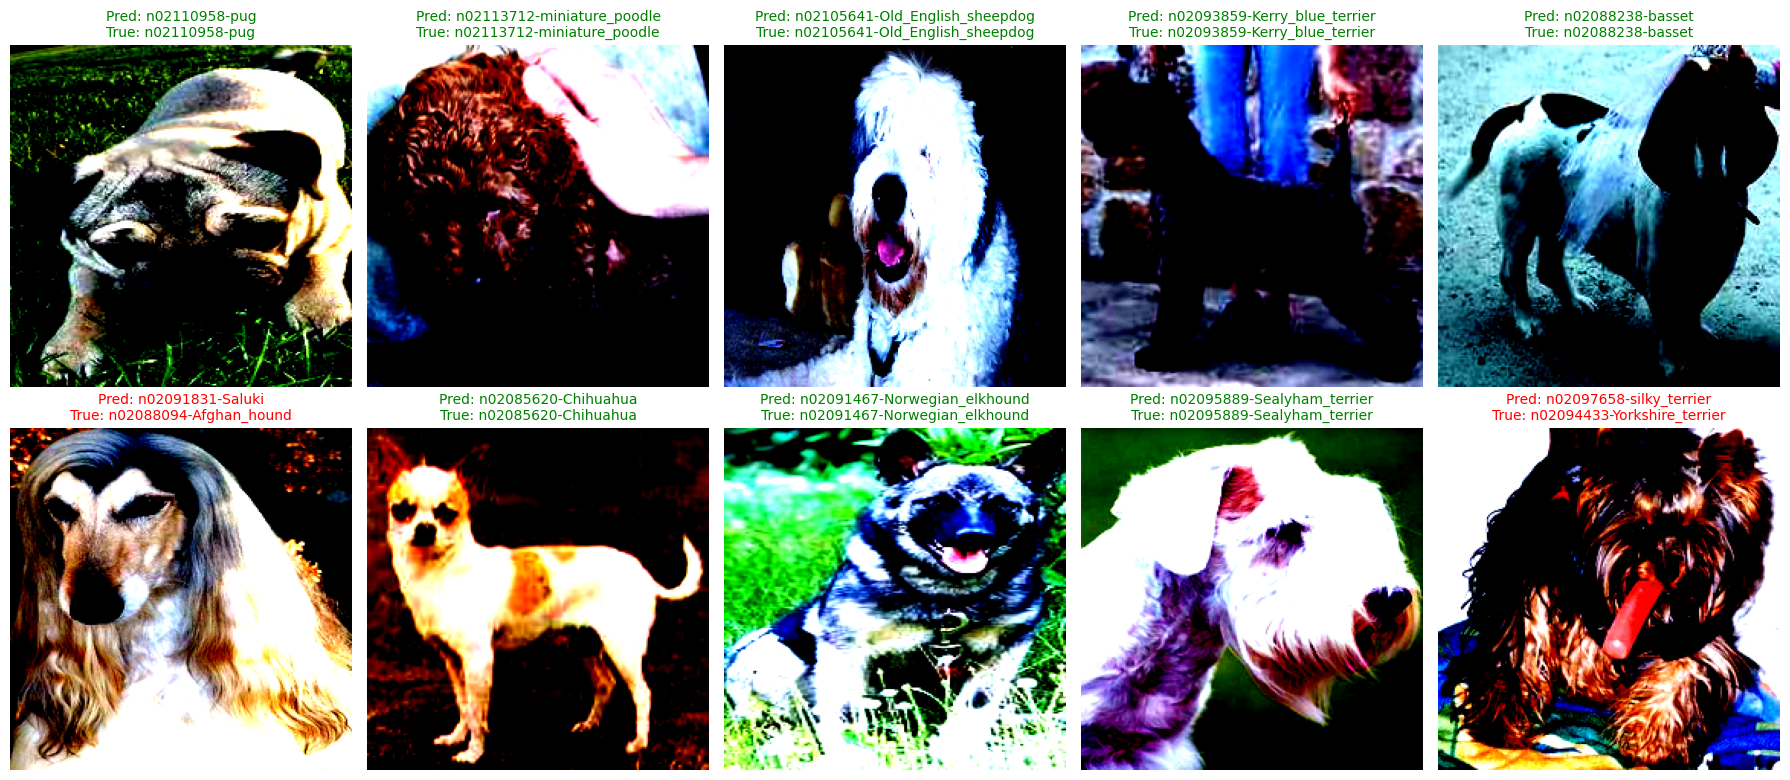

In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import random

# Select device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained model
model = CNN_Resnet_Attention()  # Assume your model class is already defined
model.load_state_dict(torch.load('dog_bcnn_resnet_attention.pt', map_location=device))
model.to(device)  # Move model to device
model.eval()  # Set model to evaluation mode

# Define image transformation (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406),
                         std=(0.229, 0.224, 0.225))
])

# Load test dataset (assumed to be cropped and stored in this folder)
test_data_path = '/kaggle/working/cropped_data'  # Adjust path if needed
test_dataset = datasets.ImageFolder(test_data_path, transform=transform)

# Get class names from dataset
class_names = test_dataset.classes

# Randomly sample 10 images from test set
num_samples = 10
sample_indices = random.sample(range(len(test_dataset)), num_samples)

# Set up plot
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

# Predict and display images
for i, idx in enumerate(sample_indices):
    image, label = test_dataset[idx]
    input_tensor = image.unsqueeze(0).to(device)  # Add batch dimension and move to device

    with torch.no_grad():
        output = model(input_tensor)  # Run inference
        _, predicted = torch.max(output, 1)  # Get predicted class
    
    pred_class = class_names[predicted.item()]
    true_class = class_names[label]

    # Set title color: green if correct, red if incorrect
    color = 'green' if predicted.item() == label else 'red'
    title = f"Pred: {pred_class}\nTrue: {true_class}"

    # Display image
    axes[i].imshow(image.permute(1, 2, 0).cpu().numpy())
    axes[i].set_title(title, fontsize=10, color=color)
    axes[i].axis('off')

# Show the complete figure
plt.tight_layout()
plt.show()
